<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-setup" data-toc-modified-id="Notebook-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook setup</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#Inferred-s-and-mu-values" data-toc-modified-id="Inferred-s-and-mu-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Inferred s and mu values</a></span></li></ul></li><li><span><a href="#League-table-(Figure-2a)" data-toc-modified-id="League-table-(Figure-2a)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>League table (Figure 2a)</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Notebook setup

In [2]:
#Imported packages
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [4]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [5]:
neutral_color='#fdbf6f'
gain_color = '#e31a1c'
loss_color = '#a6cee3'

# Import data

## Inferred s and mu values

In [11]:
#s and mu values inferred from MLE
league_table = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs.txt', sep = '\t')
league_table = league_table.set_index('mCA')
league_table = league_table.sort_values(by=['s', 'lower_95_s'], ascending = [True, True])
mCAs_league = pd.DataFrame.to_dict(league_table, orient = 'index')
mCAs_league

# League table (Figure 2a)

In [9]:
loss_upper_limit_detection_s = 0.28
CNLOH_upper_limit_detection_s = 0.21

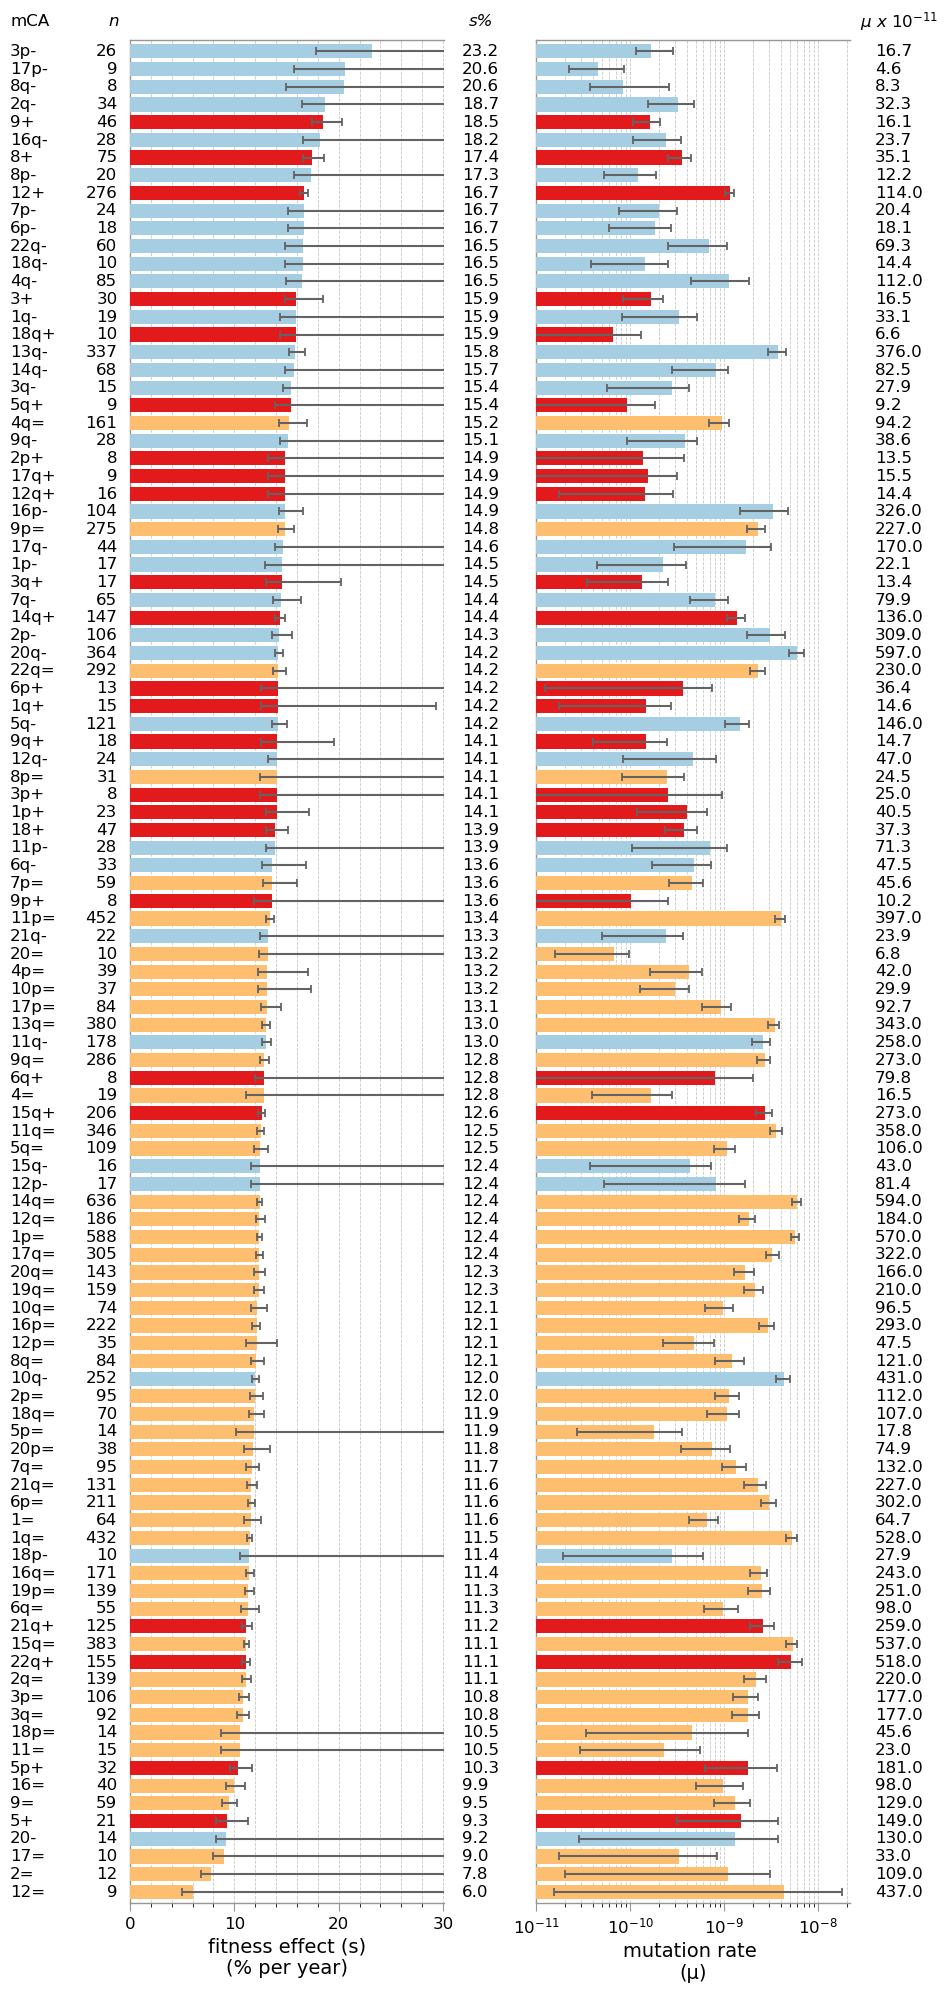

In [10]:
#plot league table
fig, axes = plt.subplots(figsize=(9.5, 20), nrows=1, ncols=2, sharey = True)
fig.subplots_adjust(hspace=0.3, wspace = 0.5)

ax1 = axes[0]
ax2 = axes[1]

y = 1

mCAs = []
s_values = []
mu_values = []
lower_s_error_list = []
upper_s_error_list = []
lower_mu_error_list = []
upper_mu_error_list = []

for k, v in mCAs_league.items():
    mCA = k
    results = v
    s = results['s']
    mu = results['mu']
    n = results['N_single_mCA']
    lower_s = results['lower_95_s']
    upper_s = results['upper_95_s']
    lower_mu = results['lower_95_mu']
    upper_mu = results['upper_95_mu']
    
    lower_s_error_list.append((s*100)-(lower_s*100))
    upper_s_error_list.append((upper_s*100)-(s*100))
    lower_mu_error_list.append(mu-lower_mu)
    upper_mu_error_list.append(upper_mu-mu)
    
    mCAs.append(mCA)
    s_values.append(s*100)
    mu_values.append(mu)

    if k[-1] == '=':
        color = neutral_color
    if k[-1] == '+':
        color = gain_color
    if k[-1] == '-':
        color = loss_color
    
    m_size = 50
    
    ax1.barh(mCA, (s*100), height = 0.8, zorder = 10, color = color)
    ax2.barh(mCA, mu, height = 0.8, zorder = 10, color = color)
    
    ax1.set_xlabel('fitness effect (s)\n(% per year)')
    ax2.set_xlabel('mutation rate \n(\u03BC)')
    
    ax1.text(-1.2, mCA, n, ha = 'right', va = 'center', fontsize = 12)
    ax1.text(-11.5, mCA, mCA, ha = 'left', va = 'center', fontsize = 12)
    if mCA[-1] == '-':
        if s > loss_upper_limit_detection_s:
            ax1.text(31.8, mCA, '>'+str(int(loss_upper_limit_detection_s*100)), ha = 'left', va = 'center', fontsize = 12)
        else:
            ax1.text(31.8, mCA, round(s*100, 1), ha = 'left', va = 'center', fontsize = 12)
    if mCA[-1] == '=':
        if s > CNLOH_upper_limit_detection_s:
            ax1.text(31.8, mCA, '>'+str(int(CNLOH_upper_limit_detection_s*100)), ha = 'left', va = 'center', fontsize = 12)
        else:
            ax1.text(31.8, mCA, round(s*100, 1), ha = 'left', va = 'center', fontsize = 12)
    if mCA[-1] == '+':
        ax1.text(31.8, mCA, round(s*100, 1), ha = 'left', va = 'center', fontsize = 12)
    ax2.text(4e-08, mCA, round(mu*1e11, 1), ha = 'left', va = 'center', fontsize = 12)

    y+=1
    
s_error_list = [tuple(lower_s_error_list), tuple(upper_s_error_list)]
mu_error_list = [tuple(lower_mu_error_list), tuple(upper_mu_error_list)]

ax1.errorbar(s_values, mCAs, color = grey4, xerr = s_error_list, capsize = 3, fmt = '.', markersize = 0, capthick = 1.3, zorder = 50)
ax2.errorbar(mu_values, mCAs, color = grey4, xerr = mu_error_list, capsize = 3, fmt = '.', markersize = 0, capthick = 1.3, zorder = 50)

    
for ax in axes.flatten():
    ax.yaxis.set_tick_params(width=0, color = 'white', length = 3)
    ax.xaxis.set_tick_params(width=0.8, color = grey3, length = 6)
    ax.spines['top'].set_visible(True)
    ax.grid(which = 'major', axis = 'x')
    ax.set_ylim(-0.65, 104.65)
    ax.grid(which = 'both', axis = 'x', zorder = 0)

ax1.set_yticks([])
ax2.set_xscale('log')

ax1.set_xlim(0, 30.1)
ax2.set_xlim(1e-11, 2.2e-8)

ax2.set_xticks([1e-11, 2e-11, 3e-11, 4e-11, 5e-11, 6e-11, 7e-11, 8e-11, 9e-11, 1e-10, 2e-10, 3e-10, 4e-10, 5e-10, 6e-10, 7e-10, 8e-10, 9e-10,\
               1e-9, 2e-9, 3e-9, 4e-9, 5e-9, 6e-9, 7e-9, 8e-9, 9e-9, 1e-8, 2e-8], minor = True)

ax1.text(-0.38, 1.01, 'mCA', ha = 'left', va = 'center', fontsize = 12, transform=ax1.transAxes)   
ax1.text(-0.07, 1.01, 'n', ha = 'left', va = 'center', fontsize = 12, transform=ax1.transAxes, style = 'italic')   
ax1.text(1.08, 1.01, 's%', ha = 'left', va = 'center', fontsize = 12, transform=ax1.transAxes, style = 'italic')
ax2.text(1.03, 1.01, '\u03BC x $10^{-11}$', ha = 'left', va = 'center', fontsize = 12, transform=ax2.transAxes, style = 'italic')

plt.tight_layout()
plt.savefig('Figures/Figure_2a_League_table.pdf')
plt.show()